In [1]:
from urbansim_templates import modelmanager as mm
from urbansim_templates.models import LargeMultinomialLogitStep
import orca
import os; os.chdir('../')
import warnings; warnings.simplefilter('ignore')
%load_ext memory_profiler

In [2]:
from scripts import datasources, models, variables

Registering model step 'auto_ownership'
Registering model step 'TOD_choice'
Registering model step 'primary_mode_choice'
Registering model step 'WLCM'


In [3]:
orca.run(['initialize_network_walk','initialize_network_beam'])

Running step 'initialize_network_walk'
Time to execute step 'initialize_network_walk': 0.00 s
Running step 'initialize_network_beam'
Time to execute step 'initialize_network_beam': 0.00 s
Total time to execute iteration 1 with iteration value None: 0.00 s


### How far can we pre-compute before the kernel crashes?

Precompute 500

In [4]:
%memit orca.run(['network_aggregations_beam'])

Running step 'network_aggregations_beam'
Computing accessibility variables
Computing jobs_30_minutes
       jobs_30_minutes
count     4.310070e+05
mean      5.410787e+05
std       5.057929e+05
min       0.000000e+00
25%       5.429000e+03
50%       5.747980e+05
75%       9.921740e+05
max       1.689665e+06
Time to execute step 'network_aggregations_beam': 1298.57 s
Total time to execute iteration 1 with iteration value None: 1298.57 s
peak memory: 26795.20 MiB, increment: 26512.47 MiB


Precompute 1000

In [4]:
%memit orca.run(['network_aggregations_beam'])

Running step 'network_aggregations_beam'
Computing accessibility variables
Computing jobs_30_minutes
       jobs_30_minutes
count     4.310070e+05
mean      5.410787e+05
std       5.057929e+05
min       0.000000e+00
25%       5.429000e+03
50%       5.747980e+05
75%       9.921740e+05
max       1.689665e+06
Time to execute step 'network_aggregations_beam': 1471.19 s
Total time to execute iteration 1 with iteration value None: 1471.19 s
peak memory: 92786.49 MiB, increment: 92502.81 MiB


Precompute 1500 -- kernel dies here

In [ ]:
%memit orca.run(['network_aggregations_beam'])

Running step 'network_aggregations_beam'


### Query the nodesbeam table

In [5]:
nodesbeam = orca.get_table('nodesbeam').to_frame()

In [16]:
nodesbeam.head()

,jobs_30_minutes
id,
0,997029.0
1,994588.0
10,1225736.0
100,987822.0
1000,1588853.0


### Plot jobs

In [6]:
netbeam = orca.get_injectable('netbeam')

(<mpl_toolkits.basemap.Basemap at 0x7fa3483d3320>,
 <Figure size 1440x1440 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa37002ee80>)

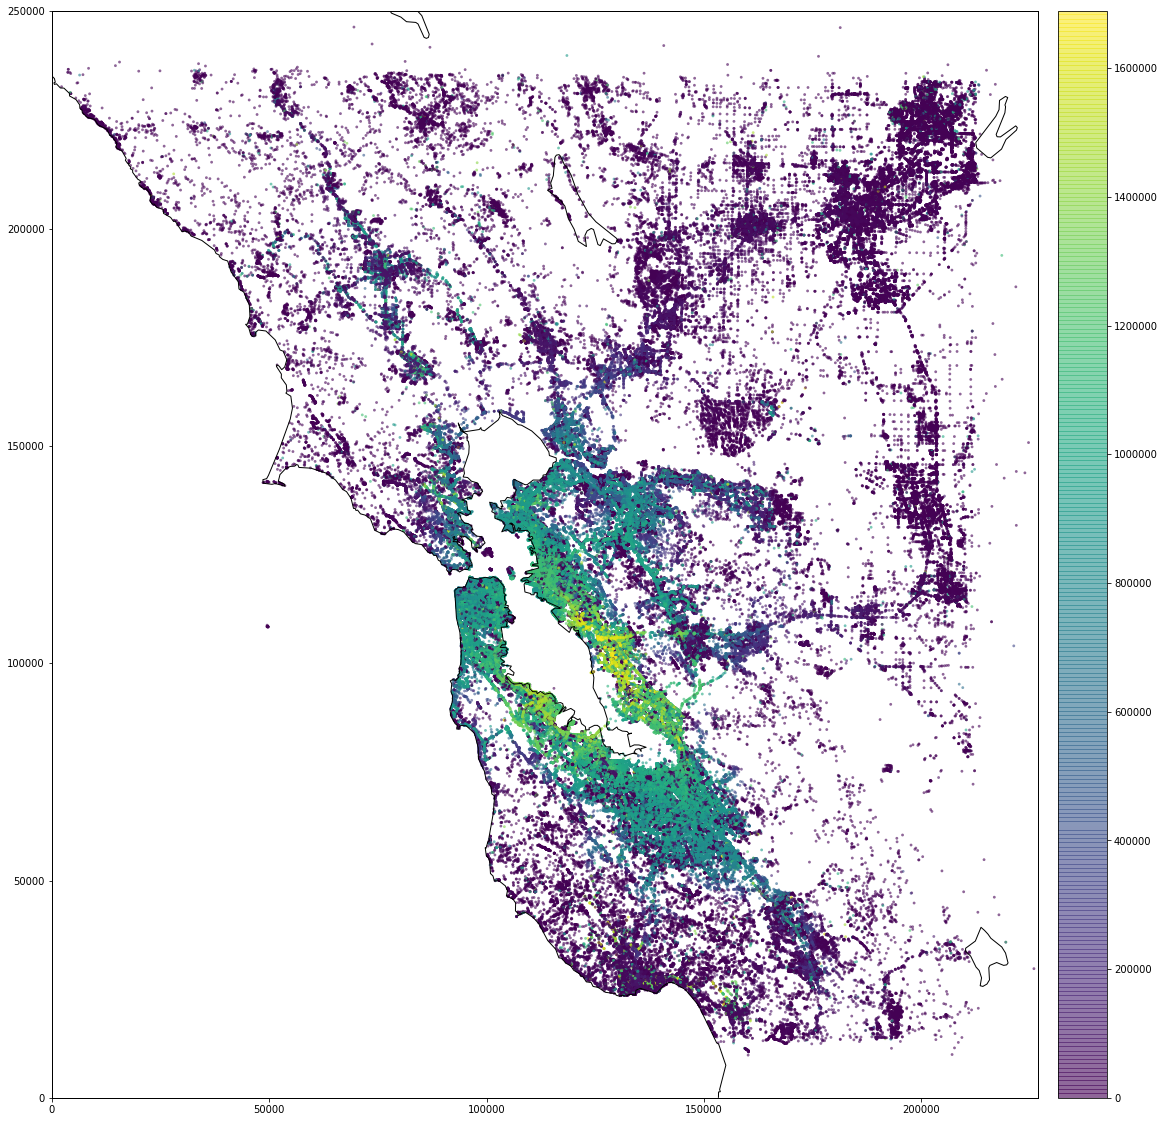

In [15]:
sf_bbox = [36.707794, -123.524338, 39, -121]

netbeam.plot(nodesbeam['jobs_30_minutes'], bbox=sf_bbox,
         fig_kwargs={'figsize': [20, 20]},
         bmap_kwargs={'suppress_ticks': False,
                      'resolution': 'h', 'epsg': '26943'},
         plot_kwargs={'cmap': 'viridis', 's': 8, 'edgecolor': 'none', 'alpha':0.6})